## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
data = boston['data']
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
feature_names = boston['feature_names']
feature_names


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
target = boston['target']
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [10]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.522570


In [16]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338
3,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875
4,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1.715000,-0.500320,1.033237,-0.278089,0.344643,-2.382098,1.124581,-1.059057,1.706891,1.578434,0.845343,-3.580942,3.085604
98,1.219719,-0.500320,1.033237,-0.278089,1.561057,0.204790,0.884955,-0.848260,1.706891,1.578434,0.845343,-3.595156,0.787522
99,1.177967,-0.500320,1.033237,-0.278089,0.344643,0.481403,1.124581,-1.071460,1.706891,1.578434,0.845343,-3.512491,1.233902
100,-0.401311,-0.500320,-0.943214,-0.278089,-0.914302,-0.424644,-0.838921,0.290806,-0.740922,-0.946166,0.081621,0.434230,0.056698


In [17]:
from sklearn.manifold import TSNE

In [18]:
help(TSNE)

Help on class TSNE in module sklearn.manifold._t_sne:

class TSNE(sklearn.base.BaseEstimator)
 |  TSNE(n_components=2, *, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0, random_state=None, method='barnes_hut', angle=0.5, n_jobs=None)
 |  
 |  t-distributed Stochastic Neighbor Embedding.
 |  
 |  t-SNE [1] is a tool to visualize high-dimensional data. It converts
 |  similarities between data points to joint probabilities and tries
 |  to minimize the Kullback-Leibler divergence between the joint
 |  probabilities of the low-dimensional embedding and the
 |  high-dimensional data. t-SNE has a cost function that is not convex,
 |  i.e. with different initializations we can get different results.
 |  
 |  It is highly recommended to use another dimensionality reduction
 |  method (e.g. PCA for dense data or TruncatedSVD for sparse data)
 |  to reduce the number of di

In [19]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [20]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

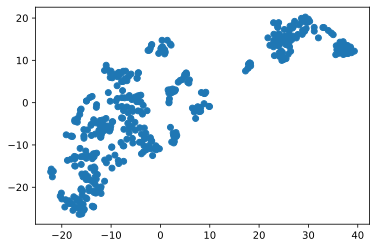

In [21]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [22]:
from sklearn.cluster import KMeans

In [23]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for 

In [24]:
model_kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [25]:
labels_train = model_kmeans.fit_predict(X_train_scaled)

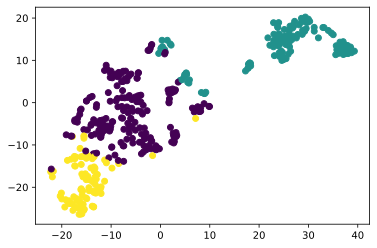

In [26]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [27]:
print(f'Среднее значение "price" в первом кластере: {y_train[labels_train == 0].mean()}')
print(f'Среднее значение "price" во втором кластере: {y_train[labels_train == 1].mean()}')
print(f'Среднее значение "price" в третьем кластере: {y_train[labels_train == 2].mean()}')

Среднее значение "price" в первом кластере: price    24.958115
dtype: float64
Среднее значение "price" во втором кластере: price    16.165354
dtype: float64
Среднее значение "price" в третьем кластере: price    27.788372
dtype: float64


In [28]:
print(f'Среднее значение "CRIM" в первом кластере: {X_train["CRIM"][labels_train == 0].mean()}')
print(f'Среднее значение "CRIM" во втором кластере: {X_train["CRIM"][labels_train == 1].mean()}')
print(f'Среднее значение "CRIM" в третьем кластере: {X_train["CRIM"][labels_train == 2].mean()}')

Среднее значение "CRIM" в первом кластере: 0.42166020942408367
Среднее значение "CRIM" во втором кластере: 10.797028425196853
Среднее значение "CRIM" в третьем кластере: 0.07356558139534886


## *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [29]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
X_test_tsne

array([[-8.46654475e-02, -9.09478855e+00],
       [-4.06562519e+00, -4.91367960e+00],
       [ 4.35094738e+00, -5.12193918e+00],
       [-3.68255186e+00, -8.59845257e+00],
       [ 6.02345276e+00, -3.11294389e+00],
       [-1.08000350e+00, -7.69099951e+00],
       [ 1.08789079e-01, -6.97110081e+00],
       [ 3.51543427e+00, -5.58331394e+00],
       [ 5.13430929e+00, -3.08600760e+00],
       [ 8.50572467e-01, -7.26510954e+00],
       [-3.22340894e+00, -4.16470432e+00],
       [-1.24080908e+00, -6.46513128e+00],
       [ 9.07792950e+00, -4.16818953e+00],
       [-1.87813437e+00, -7.94151115e+00],
       [-6.47770286e-01, -7.80586672e+00],
       [ 5.15666771e+00, -2.47492075e+00],
       [ 2.78150916e+00, -6.31367159e+00],
       [ 7.45066547e+00, -4.44129801e+00],
       [-5.84655952e+00, -1.17684040e+01],
       [ 6.36432076e+00, -3.16007757e+00],
       [-3.66662216e+00, -9.50389099e+00],
       [-4.05184031e+00, -1.02018156e+01],
       [ 6.37586892e-01, -6.13795137e+00],
       [ 1.

In [30]:
labels_test = model_kmeans.fit_predict(X_test_scaled)
labels_test

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

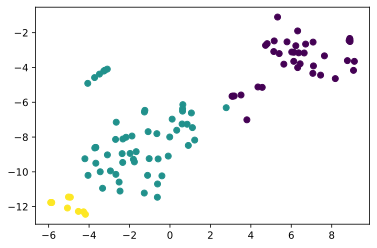

In [31]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [32]:
print(f'Среднее значение "price" в первом кластере: {y_test[labels_test == 0].mean()}')
print(f'Среднее значение "price" во втором кластере: {y_test[labels_test == 1].mean()}')
print(f'Среднее значение "price" в третьем кластере: {y_test[labels_test == 2].mean()}')

Среднее значение "price" в первом кластере: price    16.710526
dtype: float64
Среднее значение "price" во втором кластере: price    22.690909
dtype: float64
Среднее значение "price" в третьем кластере: price    34.311111
dtype: float64


In [33]:
print(f'Среднее значение "CRIM" в первом кластере: {X_test["CRIM"][labels_test == 0].mean()}')
print(f'Среднее значение "CRIM" во втором кластере: {X_test["CRIM"][labels_test == 1].mean()}')
print(f'Среднее значение "CRIM" в третьем кластере: {X_test["CRIM"][labels_test == 2].mean()}')

Среднее значение "CRIM" в первом кластере: 9.419181842105264
Среднее значение "CRIM" во втором кластере: 0.21929690909090907
Среднее значение "CRIM" в третьем кластере: 0.04070333333333334
